#**Control adaptativo de paso**
##**Control de errores y método Runge-Kutta-Fehlberg**

Antes de comenzar con el control de paso adaptativo, vamos a mostrar un ejemplo del método de Runge-Kutta de orden 4 con un atractor.


### **Atractor**
Un atractor es un conjunto de valores numéricos hacia el cual un sistema de ecuaciones tiende a evolucionar, en una gran variedad de condiciones iniciales del sistema. 

En 1963 Eduard Lorenz desarrolló un modelo matemático para calcular la inestabilidad de la atmósfera, este modelo se conoce como el  atractor de lorenz y para ciertos valores de $\sigma$, $\rho$ y $\beta$, el sistema exhibe un comportamiento caótico  y se define por la siguientes ecuaciones,

$$
\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align}
$$

Otros atractores se describen en [STRANGE ATTRACTORS](https://www.dynamicmath.xyz/strange-attractors/)

Vamos a comenzar por resolver las ecuaciones anteriores mediante el método RK4

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # hacer gráfico 3D

In [ ]:
#Runge-Kutta de cuarto orden para resolver un sistema con varias ecuaciones diferenciales
def RK4(f, y, t, tfinal, n):

  d  = len(y)       
  tsol = zeros(n)    # array tiempo
  ysol  = zeros((d, n))# array de coordenadas que contiene tanto a x, y, z      
  h = (tfinal - t)/n

  i = 0
  while i < n:
    ysol[:, i] = y 
    tsol[i] = t   

    k1 = h*f(t, y)
    k2 = h*f(t + h/2., y + k1/2.)
    k3 = h*f(t + h/2., y + k2/2.)
    k4 = h*f(t + h, y + k3)
        
    y = y + (k1 + 2.*(k2 + k3) + k4)/6.

    t = t + h   # incremente el tiempo por h
    i += 1 # incremente el contador  
        
  return ysol, tsol     # output: arrays con coords y tiempo para graficar.

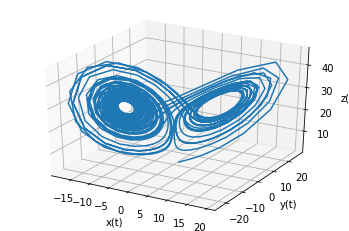

In [ ]:
# 2) usa rk4 para integrar
a, b = 0., 40.         # Intervalo [a,b] 
n = 1000            # Número máximo de pasos de integración
y0 = array([1.,1.,1.]) # condiciones iniciales 

rho = 28.0; sigma = 10.0; beta = 8.0/3.0

def f(t, y):
    f1 = sigma * (y[1] - y[0]) 
    f2 = y[0] * (rho - y[2]) - y[1]
    f3 = y[0] * y[1] - beta * y[2]
    return np.array([f1, f2, f3])
    
ysol, tsol = RK4(f, y0, a, b, n)  # integrar

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(ysol[0], ysol[1], ysol[2])
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
    
#plt.plot(tsol,ysol[0])
#plt.plot(ysol[0],ysol[1])

plt.show()

Solucionar el siguiente sistema mediante RK4
$$\frac{d^2\theta}{dt^2}=-\frac{1}{4}\frac{d\theta}{dt}-5sen(\theta)$$

$$\theta(0)=20°,\,\,\,\,\, \theta'(0)=0$$

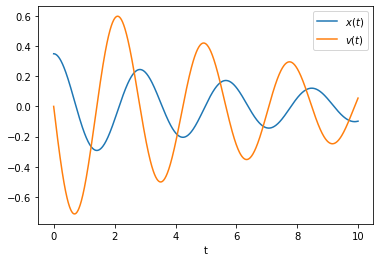

In [ ]:
#Solución para una sistema amortiguado mediante RK4 
beta = 0.25
gamma = 5.0
theta0 = np.deg2rad(20)

a, b = 0., 10.         # Intervalo [a,b] 
n = 1000
y0 = np.array([theta0, 0.0]) # condiciones iniciales 


def f(t, y): # y[0]=Theta, y[1]=Theta'
  f1 = y[1] 
  f2 = -beta*y[1] - gamma*np.sin(y[0])  
  return np.array([f1, f2])

ysol, tsol = RK4(f, y0, a, b, n)  # integrar
    
plt.plot(tsol, ysol[0])
plt.plot(tsol, ysol[1])
#plt.plot(ysol[0],ysol[1])
plt.legend( ["$x(t)$", "$v(t)$"], numpoints=1)
plt.xlabel('t')
plt.show()



##**¿Cómo obtener un *h* óptimo?**
¿Cómo saber si el $h$ elegido es el mejor?
#**Adaptive Step Size Control**

### **Runge-Kutta-Fehlberg Method (RKF45)**
 Este método tiene control del error a cada paso, y por lo tanto es de paso, $h_i$, variable. Se llama RKF45 debido a que combina una aproximación $O(h^{4})$ de Runge-Kutta junto con otra de orden $O(h^{5})$ para calcular el error.
De acuerdo con el error absoluto, este es dado por

$$\text{error} =|y_{i+1} - y|$$
donde $y$ es la solución exacta en $t_i +h$, pero dado que no se conoce $y$, pues no siempre es posible obtener una solución analítica, entonces aproximamos al valor $y\approx \tilde{y}_{i+1}$ de orden  $O(h^{5})$. Las dos aproximaciones que trabajaremos son:

La aproximación de Runge-Kutta a $O(h^{4})$:


$$ 
 \mathbf{y}_{i+1} = \mathbf{y}_{i}  + \frac{25}{216}\mathbf{k}_1 + \frac{1408}{2565}\mathbf{k}_3 + \frac{2197}{4104}\mathbf{k}_4 - \frac{1}{5}\mathbf{k}_5,
$$

Y una mejor aproximación de Runge-Kutta a orden $O(h^{5})$:
 

$$
\mathbf{\tilde{y}}_{i+1} = \mathbf{y}_{i}  + \frac{16}{135}\mathbf{k}_1 + \frac{6656}{12825}\mathbf{k}_3 + \frac{28561}{56430}\mathbf{k}_4 - \frac{9}{50}\mathbf{k}_5 + \frac{2}{55}\mathbf{k}_6,
$$
 
donde, similar al método RK4, tenemos

$$
\begin{eqnarray}
\mathbf{k}_1 &=& h\mathbf{f}\left(t_i, \mathbf{y}_i\right), \\
\mathbf{k}_2 &=& h\mathbf{f}\left(t_i + \frac{h}{4}, \mathbf{y}_i + \frac{\mathbf{k}_1}{4}\right),\\
\mathbf{k}_3 &=& h\mathbf{f}\left(t_i + \frac{3}{8}h, \mathbf{y}_i + \frac{3}{32}\mathbf{k}_1 + \frac{9}{32}\mathbf{k}_2\right),\\
\mathbf{k}_4 &=& h\mathbf{f}\left(t_i + \frac{12}{13}h, \mathbf{y}_i + \frac{1932}{2197}\mathbf{k}_1 - \frac{7200}{2197}\mathbf{k}_2 + \frac{7296}{2197}\mathbf{k}_3\right),\\
\mathbf{k}_5 &=& h\mathbf{f}\left(t_i + h, \mathbf{y}_i + \frac{439}{216}\mathbf{k}_1 - 8\mathbf{k}_2 + \frac{3680}{513}\mathbf{k}_3 - \frac{845}{4104}\mathbf{k}_4\right),\\
\mathbf{k}_6 &=& h\mathbf{f}\left(t_i + \frac{1}{2}h, \mathbf{y}_i - \frac{8}{27}\mathbf{k}_1 + 2\mathbf{k}_2 - \frac{3544}{2565}\mathbf{k}_3 + \frac{1859}{4104}\mathbf{k}_4 - \frac{11}{40}\mathbf{k}_5\right),
\end{eqnarray}
$$

Para encontrar el $h$ más óptimo siempre haremos un re-escalamiento del $h$ inicial, dependiendo directamente del error encontrado. El paso más óptimo es dado por $h\rightarrow qh$,

$$
q=\left(\frac{\epsilon h}{2|\mathbf{\tilde{y}}_{i+1} -\mathbf{y}_{i+1}|}\right)^{\frac{1}{4}}\approx 
0.84\left(\frac{\epsilon h}{\text{error}}\right)^{\frac{1}{4}},
$$

donde $\epsilon$ es una tolerancia impuesta y el error entre las dos aproximaciones es dado por $error = |\mathbf{\tilde{y}}_{i+1} -\mathbf{y}_{i+1}|$, pero por eficiencia computacional es mejor calcularlo como,

$$
\begin{eqnarray}
\text{error} 
&=& \text{max}\left(\mathbf{\tilde{y}}_{i+1} -\mathbf{y}_{i+1}\right),\\
&=& \text{max}\left(\frac{\mathbf{k}_1}{360} - \frac{128}{4275}\mathbf{k}_3 - \frac{2197}{75240}\mathbf{k}_4 + \frac{\mathbf{k}_5}{50} + \frac{2}{55}\mathbf{k}_6\right),
\end{eqnarray}
$$        

donde $\text{max}()$ retorna la componente vectorial más grande en valor absoluto. 

Para determinar el $h$ más óptimo a cada paso se usan dos aproximaciones diferentes de la solución, tanto $\mathbf{y}_{i+1}$ como $\mathbf{\tilde{y}}_{i+1}$, y se comparan, si las dos aproximaciones son similares de acuerdo a cierta tolerancia ($\epsilon$) se acepta $\mathbf{y}_{i+1}$ y se incrementa o reduce $h$ multiplicando por el factor $q$, *siempre se escala* $h$ a $qh$ y se recalcula $\mathbf{y}_{i+1}$. 

Si observa $q$, 
$$
q=0.84\left(\frac{\epsilon h}{\text{error}}\right)^{\frac{1}{4}},
$$


*   Cuando el $error$ es pequeño (escogió un $h$ inicial demasiado pequeño), entonces $q$ será grande y $h\rightarrow qh$ incrementará
*   Cuando el $error$ es grande (escogió un $h$ inicial demasiado grande), entonces $q$ será pequeño y $h\rightarrow qh$ disminuirá

Por estabilidad y eficiencia los valores de $q$ y $h$ se restringirán a los intervalos $0.1 \leq q \leq 5.0$ y  $h_{min} \leq h \leq h_{max}$.

Aunque RK45 calcula 6 veces la función $f(t,y)$, es en general más rápido y preciso que RK4 (para más detalles ver el libro de Burden). 

Vamos a implementar el método RKF45 con $\epsilon = 10^{-5}$✅

In [ ]:
def RKF45(f, y, t, tfinal, hmin = 0.001, hmax = 5., Tol = 1e-5):
    d  = len(y)         # tamaño del sistema de ecuaciones 
       
    h = hmax            # inicializar h al valor máximo 
    tt = t              # array 1 dim del tiempo
    Y  = np.array([y])  # array 2 dim con coords      

    while t < b:
        k1 = h*f(t, y)                
        k2 = h*f(t + h/4, y + k1/4)
        k3 = h*f(t + 3/8*h, y + 3/32*k1 + 9/32*k2)
        k4 = h*f(t + 12/13*h, y + 1932/2197*k1 - 7200/2197*k2 + 7296/2197*k3)
        k5 = h*f(t + h, y + 439/216*k1 - 8*k2 + 3680/513*k3 - 845/4104*k4)
        k6 = h*f(t + 1/2*h, y - 8/27*k1 + 2*k2 - 3544/2565*k3 + 1859/4104*k4 - 11/40*k5)

        # Calculamos el error
        error = (np.abs(k1/360 - 128/4275*k3 - 2197/75240*k4 + k5/50 + 2/55*k6)).max()

        # Aceptar or rechazar el paso de integración i+1 
        if (error/h < Tol): 
  
           y = y + 25/216*k1 + 1408/2565*k3 + 2197/4104*k4 - k5/5 #Solución aproximada
           t += h               # incremente en h el tiempo

           Y  = np.append(Y, np.array([y]), axis=0)
           tt = np.append(tt,t)                    
           
        #Se estima el h más óptimo para el siguiente paso 
        q = 0.84*(Tol*h/error)**0.25 # scalar a multiplicar h--> s*h
        
        if (q <= 0.1): h = 0.1*h   # (error grande) 0.1 es el mínimo valor impuesto para q
        elif (q >= 5): h = 5.*h    # 5 es el máximo valor impuesto para q
        else:          h = q*h     # escalar h a q*h, paso ideal ( 0.1 < q < 5)
        
        if   (h > hmax): h = hmax  # no permitir h más grande que hmax
        elif (h < hmin): 
            print('(h no permitido.')
            break
            
        if (t+h > b): h = b - t    # garantizar que en el último paso t = b  
                    
    return Y.T, tt # output: arrays con coordenadas y tiempo para gráficar.

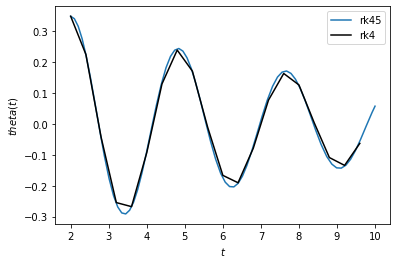

In [ ]:
beta = 0.25
gamma = 5.0
theta0 = np.deg2rad(20)

a, b = 2., 10.         # Intervalo [a,b] 
n = 20
y0 = np.array([theta0, 0.0]) # condiciones iniciales 


def f(t, y):
  f1 = y[1]
  f2 = -beta*y[1] - gamma*np.sin(y[0])
  return np.array([f1, f2])

####### plot RKF45  #######
Y, t = RKF45(f, y0, a, b)     

plt.plot(t, Y[0],label='rk45') 

####### plot RK4  #######
Y1, t1 = RK4(f, y0, a, b, n)     

plt.plot(t1, Y1[0],label='rk4',c='k')

plt.ylabel('$theta(t)$')
plt.xlabel('$t$')
plt.legend()
plt.show()


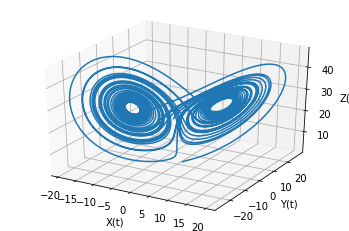

In [ ]:
# Atractor de Lorenz
a, b = 0., 40.         # Intervalo [a,b] 
y0 = array([1.,1.,1.]) # condiciones iniciales 

rho = 28.0; sigma = 10.0; beta = 8.0/3.0

def f(t, y):
    f1 = sigma * (y[1] - y[0]) 
    f2 = y[0] * (rho - y[2]) - y[1]
    f3 = y[0] * y[1] - beta * y[2]
    return np.array([f1, f2, f3])
    
Y, time = RKF45(f, y0, a, b)  # integrar
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Y[0], Y[1], Y[2])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')

plt.show()

Implementar RKF45 para el sistema amortiguado✅

La siguiente rutina usa la función de la librería **scipy** *scipy.integrate.odeint* implementada para integrar ecuaciones diferenciales

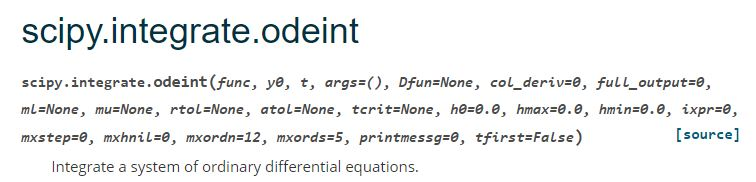

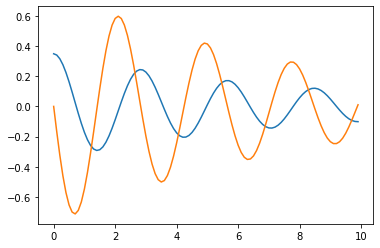

In [ ]:
# 1) usa scipy para integrar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint      # método de integracion scipy

beta = 0.25
gamma = 5.0
theta0 = np.deg2rad(20)

a, b = 0., 10.         # Intervalo [a,b] 
n = 20
y20 = np.array([theta0, 0.0]) # condiciones iniciales 
t2 = np.arange(0.0, 10.0, 0.1)

def fun(y2, t2):
  fun1 = y2[1]
  fun2 = -beta*y2[1] - gamma*np.sin(y2[0])
  return np.array([fun1, fun2])

y2 = odeint(fun, y20, t2) # Integrar el sistema ode, dy/dt = f(y, t0, ...)

plt.plot(t2,y2)
plt.show()

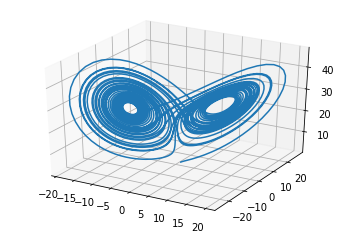

In [ ]:
# 1) usa scipy para integrar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint      # método de integracion scipy
from mpl_toolkits.mplot3d import Axes3D # hacer gráfico 3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state             # crear una tupla de la forma (x,y,z)       
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  

state0 = [1.0, 1.0, 1.0]      # condición inicial
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t) # Integra el sistema

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

[1] Richard, L., & Burden, J. (2011). Douglas faires, numerical analysis.

[2] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.

[3] Pang, T. (1999). An introduction to computational physics.
